# Seattle vs San Franciso Basic Categories of Crimes

## Introduction

Analyzing data from too different sources always presents a challenge. This is especially true of self-reported data as there are no real standards for providing the data. This goes along with the recurring theme of what I have been learning when it comes to data not being "clean". A comparison of Summer of 2014 Statistics of Crime in Seattle, WA and San Francisco, CA provides evidence of this. 

In [50]:
# Import the data first
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

st = pd.read_csv('seattle_incidents_summer_2014.csv')
sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

## Generalized Plots

The first step visualization is to provide a plot of the just to examine it from a high level point-of-view. In this case a horizontal bar chart was used and I was able sort the data by most common type of crime in Seattle and San Francisco by inverting the y-axis.

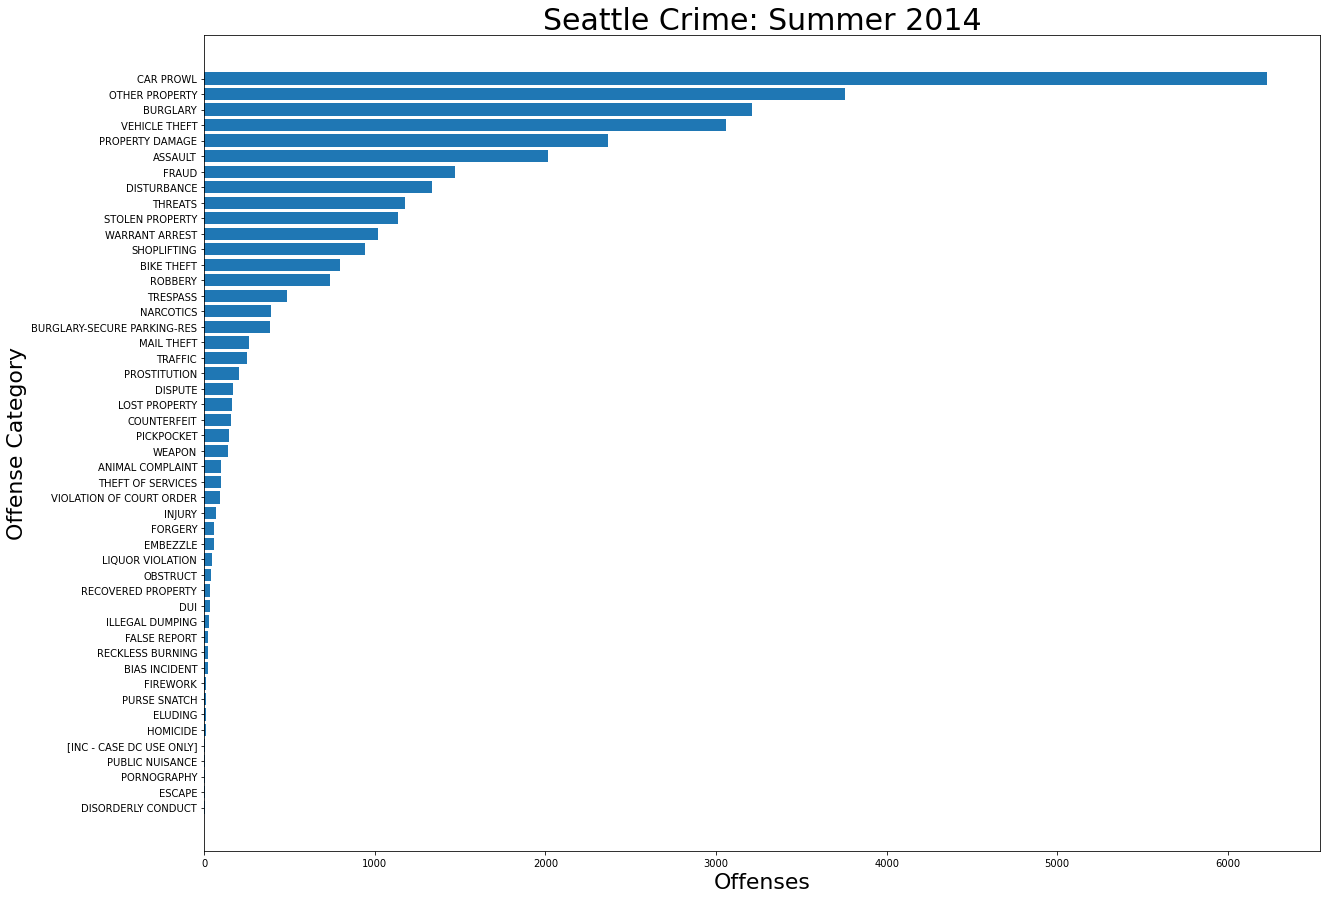

In [51]:
# Plot summary Seattl
st_summary = st['Summarized Offense Description'].value_counts()
fig, ax1 = plt.subplots(figsize=(20, 15))
values = [float(v) for v in st_summary]
labels = [str(k) for k in st_summary.keys()]
ax1.set_title('Seattle Crime: Summer 2014', fontsize=30)
ax1.set_ylabel('Offense Category', fontsize =22)
ax1.set_xlabel("Offenses", fontsize =22)
ax1.barh(labels, values)
ax1.invert_yaxis()
plt.show()

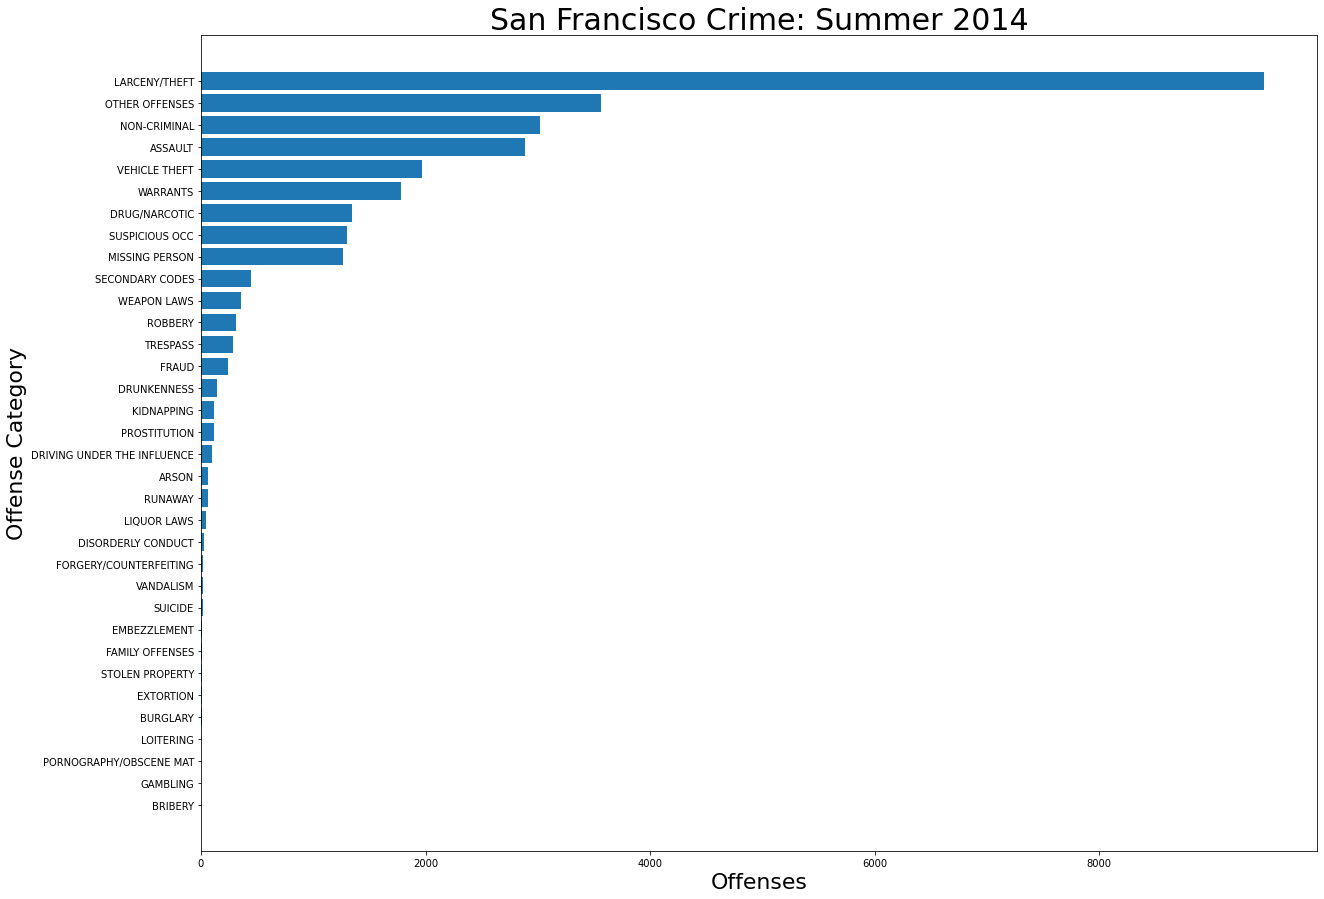

In [52]:
# Plot summary Seattl
sf_summary = sf['Category'].value_counts()
fig2, ax2 = plt.subplots(figsize=(20, 15))
values = [float(v) for v in sf_summary]
labels = [str(k) for k in sf_summary.keys()]
ax2.set_title('San Francisco Crime: Summer 2014', fontsize=30)
ax2.set_ylabel('Offense Category', fontsize =22)
ax2.set_xlabel("Offenses", fontsize =22)
ax2.barh(labels, values)
ax2.invert_yaxis()
plt.show()

## Quick Overview of the basic Data

Looking that horizontal bar graphs it is very easy to analyze the types of crimes commmited in a single city. However, this analysis becomes more complex when looking at the crime from the perspective of both cities separately. A quick look into both horizontal bar graphs reveals that the most common offense commmited in Seattle was Car Prowl while in San Francisco it was a Larceny/Theft. Both of these trends have to do with Theft indicating that there is a problem of theft, but not necesarily what kind. This already complicates matters of trying to direct comparisons between the two cities in the Summer of 2014 as the Car Prowling can also fit into the Larceny/Theft category found in San Francisco. As a city Seattle had significantly more categories than San Francisco. This lead to more generalized categories of crime for San Francisco. However, that is not to say that there weren't specific categories in San Francisco.  Two obvious specific categories in San Francisco were Runaways and Suicide. This in some way also displays the priorities that each city may take into account. For Seattle Runaways and Suicides were not as important and this information is lost to us by possibly being integrated. A direct analysis will probably require a consolidation of the categories to see trends better than is apparent from comparing these two graphs.

In [53]:
#Mapping crime categories to basic crime categories
st_basic = {'Personal': ['ASSAULT', 'FRAUD', 'DISTURBANCE', 'THREATS', 'STOLEN PROPERTY', 'TRESPASS', 'DISPUTE', 'THEFT OF SERVICES', 'INJURY', 'DUI', 'PURSE SNATCH', 'HOMICIDE'], \
            'Property': ['CAR PROWL', 'OTHER PROPERTY', 'VEHICLE THEFT', 'PROPERTY DAMAGE', 'SHOPLIFTING', 'BIKE THEFT', 'ROBBERY', 'MAIL THEFT', 'LOST PROPERTY', 'PICKPOCKET', \
                         'RECOVERED PROPERTY', 'BURGLARY-SECURE PARKING-RES', 'ILLEGAL DUMPING', 'RECKLESS BURNING', 'FIREWORK', 'COUNTERFEIT', 'FORGERY'], \
            'Inchoate': ['PROSTITUTION', 'WEAPON', 'LIQUOR VIOLATION', 'OBSTRUCT', 'FALSE REPORT', 'ELUDING', 'PUBLIC NUISANCE', 'ESCAPE', 'DISORDERLY CONDUCT'], \
            'Other': ['WARRANT ARREST', 'NARCOTICS', 'TRAFFIC', 'ANIMAL COMPLAINT', 'VIOLATION OF COURT ORDER', 'EMBEZZLE', 'BIAS INCIDENT', \
                      '[INC - CASE DC USE ONLY]', 'PORNOGRAPHY']}
st_basic_count = {'Personal': 0, 'Property': 0, 'Inchoate': 0, 'Other': 0}
sf_basic = {'Personal': ['ASSAULT', 'MISSING PERSON', 'TRESPASS', 'FRAUD', 'DRUNKENNESS', 'KIDNAPPING', 'DRIVING UNDER THE INFLUENCE', 'DISORDERLY CONDUCT', 'SUICIDE', 'FAMILY OFFENSES', \
                        'EXTORTION'], \
            'Property': ['LARCENY/THEFT', 'VEHICLE THEFT', 'ROBBERY', 'ARSON', 'VANDALISM', 'STOLEN PROPERTY', 'BURGLARY', 'FORGERY/COUNTERFEITING', 'LOITERING'], \
            'Inchoate': ['SUSPICIOUS OCC', 'WEAPON LAWS', 'PROSTITUTION', 'LIQUOR LAWS', 'GAMBLING', 'BRIBERY'], \
            'Other': ['OTHER OFFENSES', 'NON-CRIMINAL', 'WARRANTS', 'DRUG/NARCOTIC', 'SECONDARY CODES', 'RUNAWAY','EMBEZZLEMENT', \
                      'PORNOGRAPHY/OBSCENE MAT']}
sf_basic_count = {'Personal': 0, 'Property': 0, 'Inchoate': 0, 'Other': 0}
for k in st_summary.keys():
    for j in st_basic.keys():
        if k in st_basic[j]:
            st_basic_count[j] += st_summary[k]
            
for k in sf_summary.keys():
    for j in sf_basic.keys():
        if k in sf_basic[j]:
            sf_basic_count[j] += sf_summary[k]

## Consolidation of Categories

Using the link [here](https://www.legalmatch.com/law-library/article/what-are-the-different-types-of-crimes.html), four basic categories were selected to represent crimes in both cities Personal Crimes, Property Crimes, Incohoate Crimes, & Other Crimes. While this simplification does reduce the view of more specific crimes, it does enable the view of a direct comparison between the two cities. To get a better understanding, the crimes are described as following:

1. Personal Crimes: Are offenses against a person. These can be things like murder, battery, or rape against an individual.
2. Propety Crimes: Are offenses against property. These can be things like theft, arson, or forgery.
3. Inchoate Crimes: Are incomplete offenses. These are crimes like solicitation or conspiracy.
4. Other Crimes: All other crimes.

There are several crimes that could be fit into multiple categories, so each crime was chosen to be a part of the crime that it was subjectively closest to. There is no denying that for certain items there was subjectivity to where it could go. As an example the category Purse Snatching at first glance seems like an obvious property type. However, due to the nature of the crime it may also be classified as personal. This is due to the fact that purse snatching definitely is up close and the person can experience it. There is also the fact that Inchoate crimes are by the very nature crimes that were not completed so while attempting to sell alcohol to minors is clear, a Liquor Laws category may not be so clear cut. Without a doubt a big challenge in this analysis is "cleaning" the data. After cleaning the data it was time to plot the new categories.

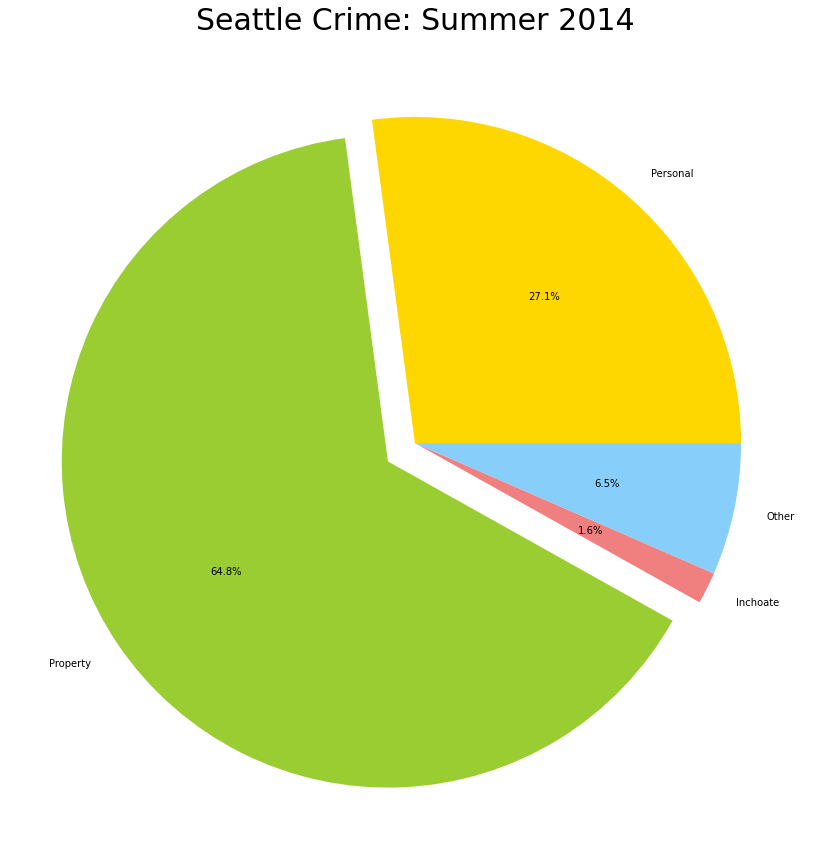

In [54]:
fig3, ax3 = plt.subplots(figsize=(20, 15))
labels = st_basic_count.keys()
values = st_basic_count.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)
ax3.set_title('Seattle Crime: Summer 2014', fontsize=30)
ax3 = plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()

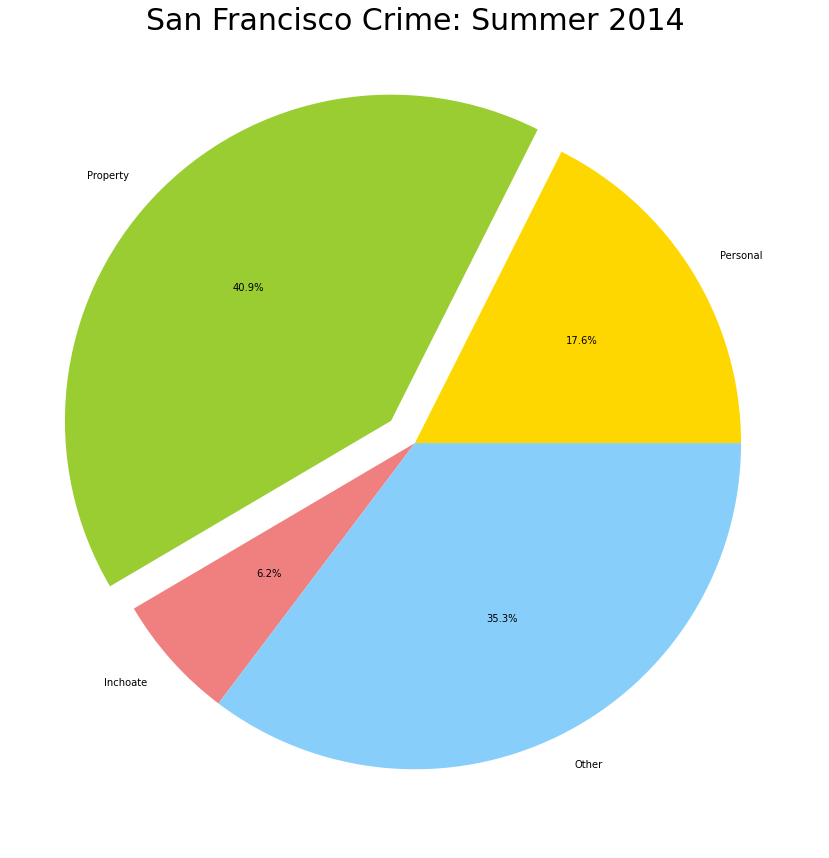

In [55]:
fig4, ax4 = plt.subplots(figsize=(20, 15))
labels = sf_basic_count.keys()
values = sf_basic_count.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)
ax4.set_title('San Francisco Crime: Summer 2014', fontsize=30)
ax4 = plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()

## Higher Level Analysis

Without a doubt a pie chart with percentages is much easier to understand than shown in the previous graphs. It is obvious from the pie graphs that these charts are much easier to see than previously shown. In fact from the views it can be seen that part of the reason that a pie chart is more appropriate here is because of the lower number of categories. The high number of categories made the horizontal bar chart more appropriate in the previous examples. Now that that the categories are joined a few things become obvious.

1. Property crimes were the most common types of crime especially in Seattle where they comprised over two-thirds of all crime.
2. San Francisco appears to have lower amounts of personal crimes. Though this also appears to be incluenced by the fact that there were less and more generalized categories.
3. Inchoate crimes were the lowest type of crime both being in the single digits in both cities.

## Conclusion

This view definitely reduces an analysis of the certain crimes in more detail. However, as can be seen the differing view of the data gives a different type of insight than is seen from the previous view. By changing views that are seen different types of analyses can be made. It is this type of experimenting of views that can lead people to make a different conclusion than previously obvious to the observer. In this case there was a difference seen in trying to compare to different sets of categories in the same domain of number of crimes. Further analyses can provide further insights by displaying the data in different ways of course precautions must be taken to not misrepresent data in a way that it wasn't meant to be presented.